In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


# Limpieza de datos

In [4]:
df_data.TotalCharges = pd.to_numeric(df_data.TotalCharges, errors='coerce')

In [5]:
df_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

## Eliminando nulos

In [6]:
df_data.dropna(inplace=True)

## Eliminando ID

In [7]:
df_data.drop('customerID', axis=1, inplace=True)

In [8]:
df_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Convertir a numerico variable objetivo

In [9]:
df_data['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_data['Churn'].replace(to_replace='No', value=0, inplace=True)

In [10]:
df_data_processing = df_data.copy()

## Manejo variables categoricas

In [11]:
df_data_processing = pd.get_dummies(df_data_processing)
df_data_processing.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


## Analisis de correlacion

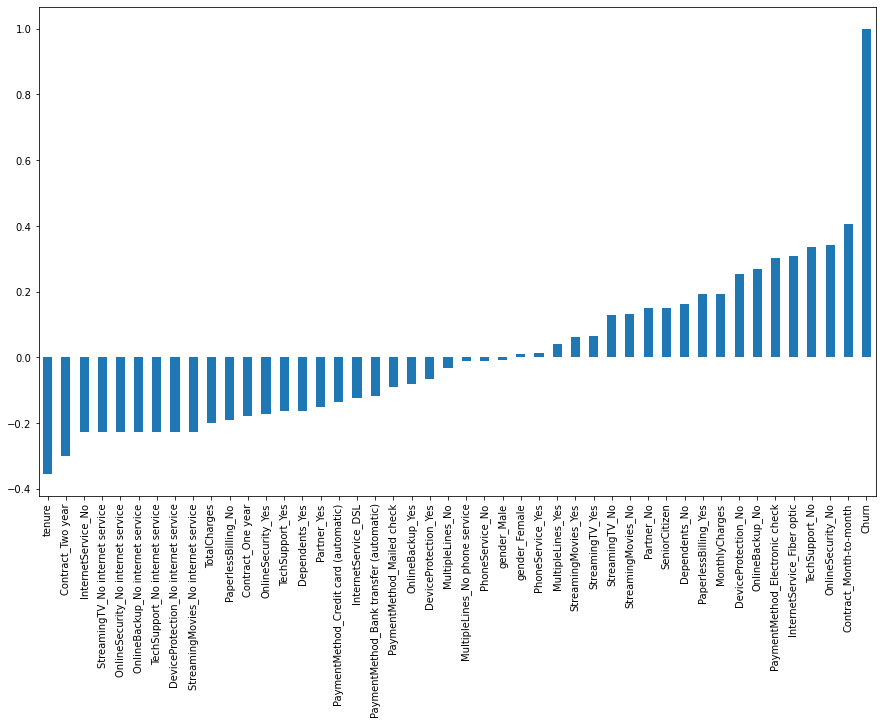

In [12]:
fig = plt.figure(figsize=(15,9))
df_data_processing.corr()['Churn'].sort_values(ascending=True).plot(kind='bar')
plt.show()

## Escalabilidad de datos

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()
df_data_processing_scaled = scaler.fit_transform(df_data_processing)

In [15]:
df_data_processing_scaled = pd.DataFrame(df_data_processing_scaled)

In [16]:
df_data_processing_scaled.columns = df_data_processing.columns

In [17]:
df_data_processing_scaled.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,0.0,1.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,1.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


## Analisis eporatorio de datos

In [18]:
import seaborn as sns

In [19]:
def plot_category(column):
    fig = plt.figure(figsize=(10,10))
    sns.countplot(data=df_data, x=column, hue='Churn')
    plt.show()

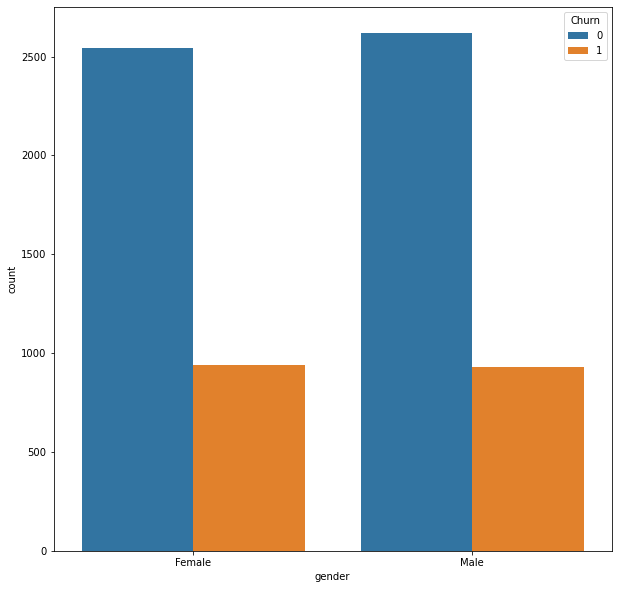

In [20]:
plot_category('gender')

In [21]:
column_cat = df_data.select_dtypes(include='object').columns

In [22]:
column_cat

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

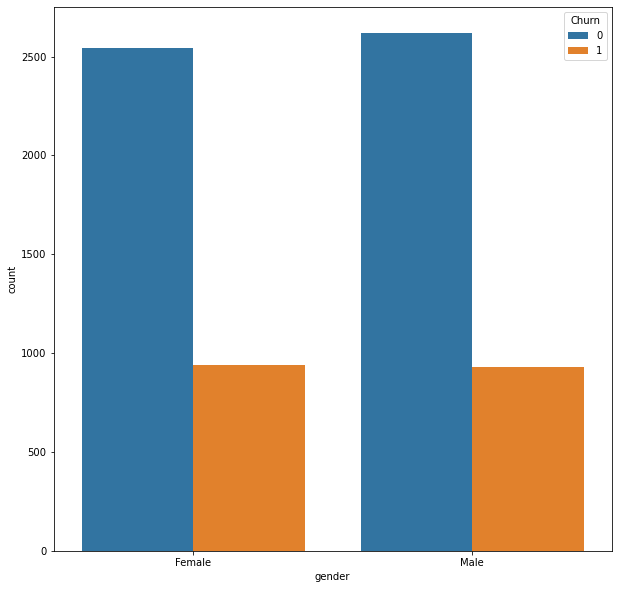

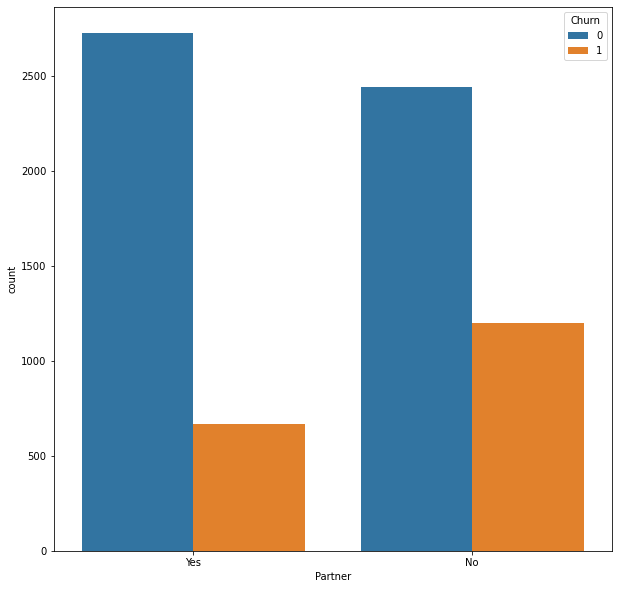

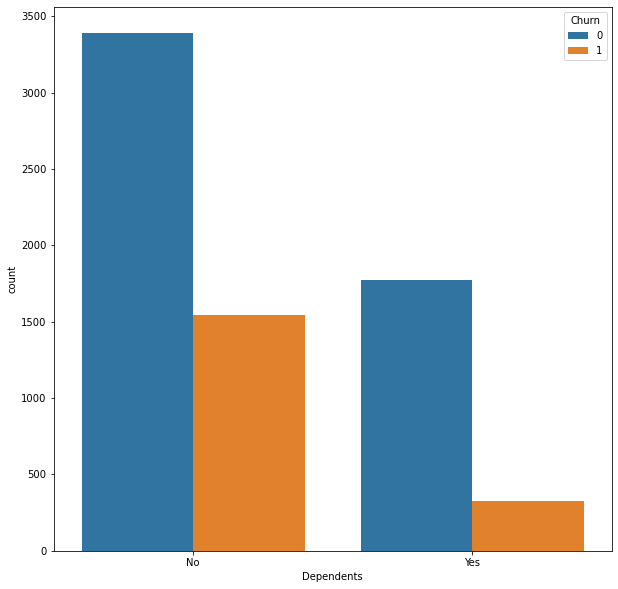

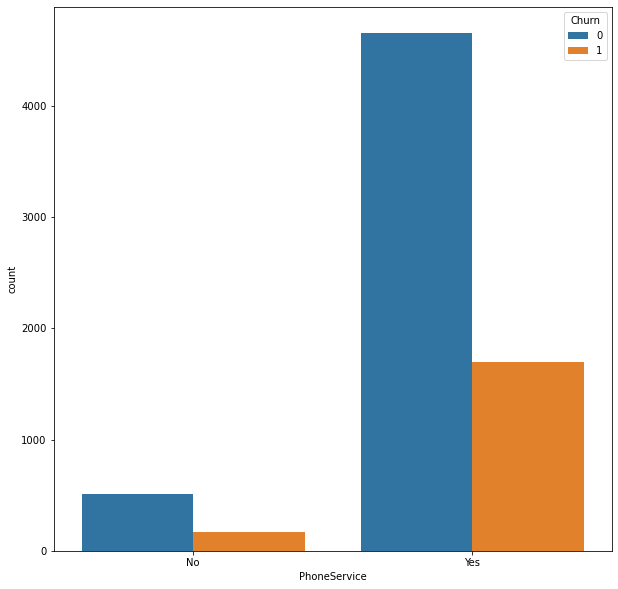

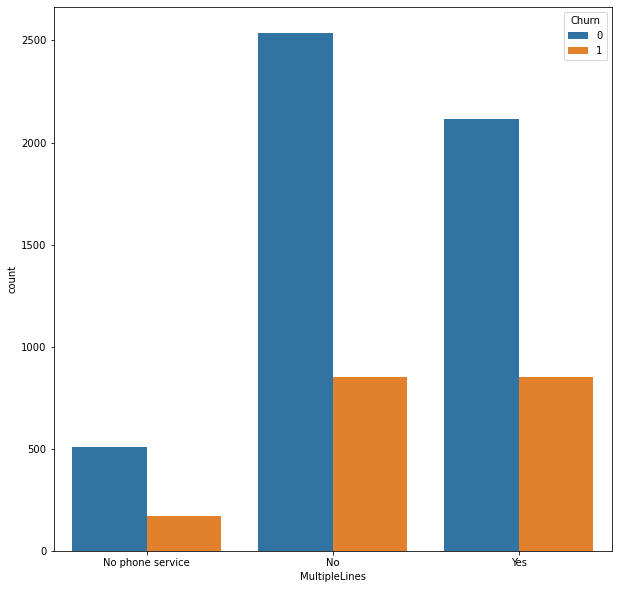

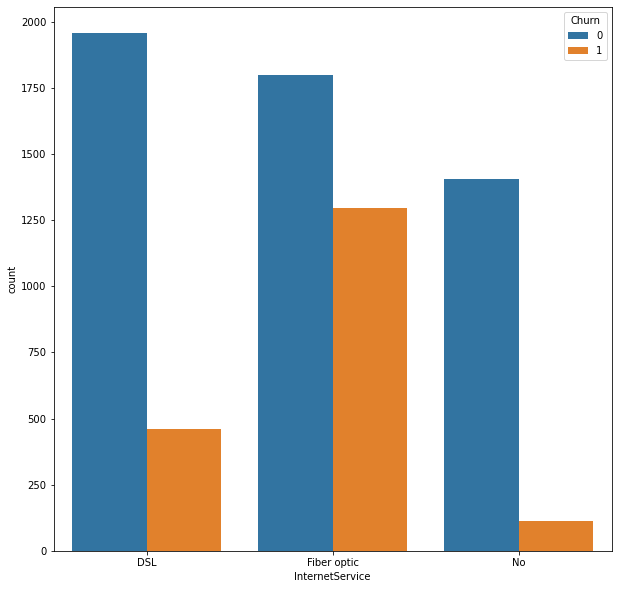

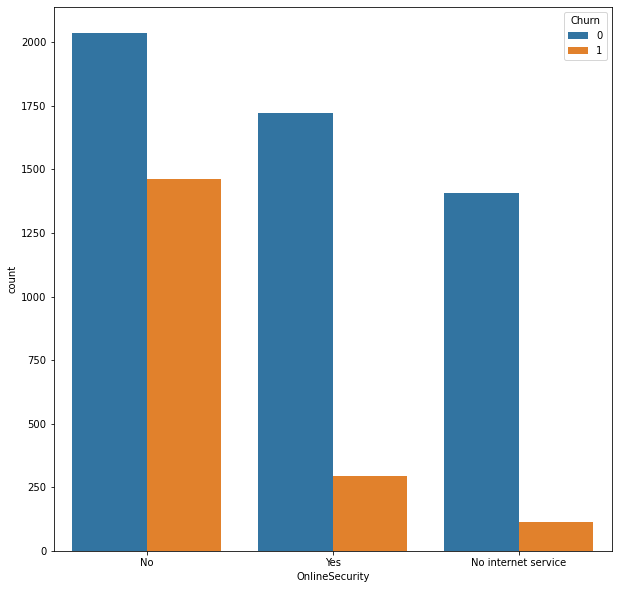

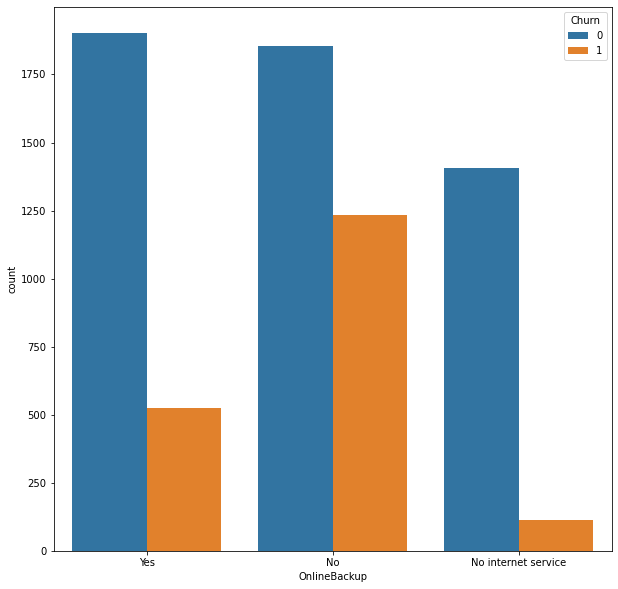

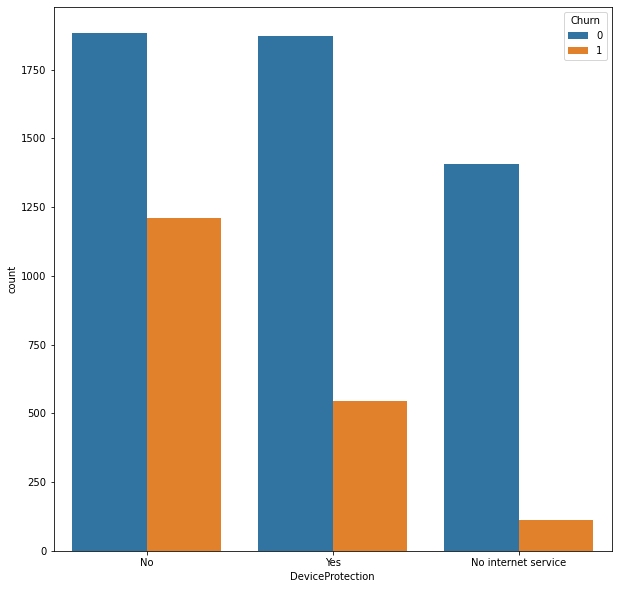

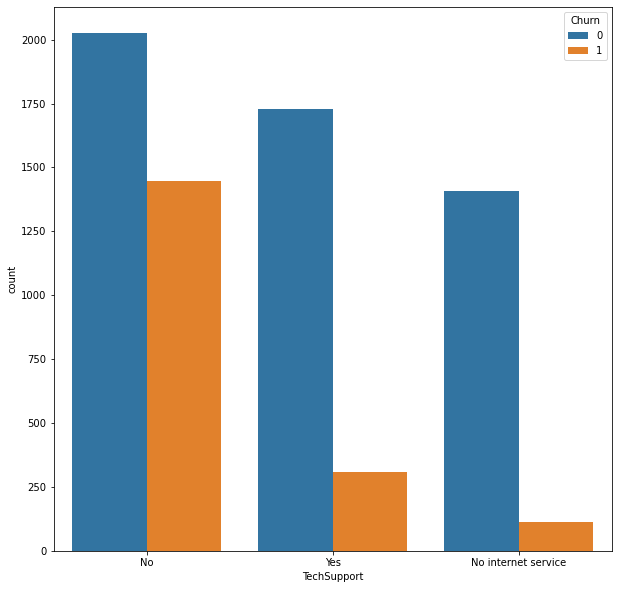

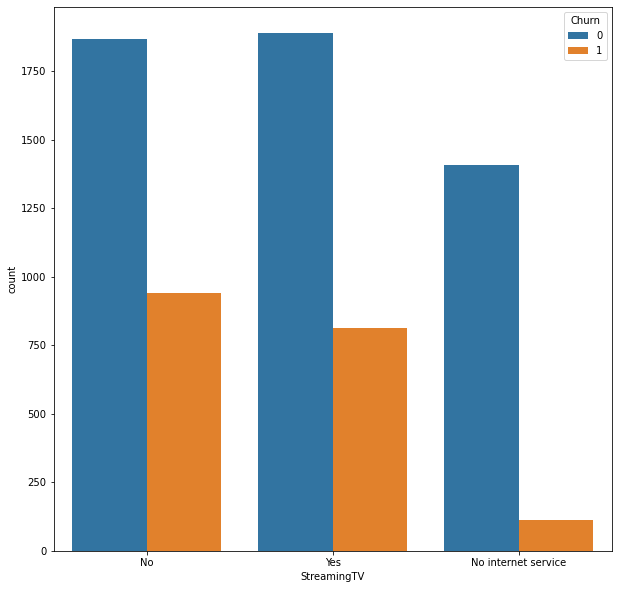

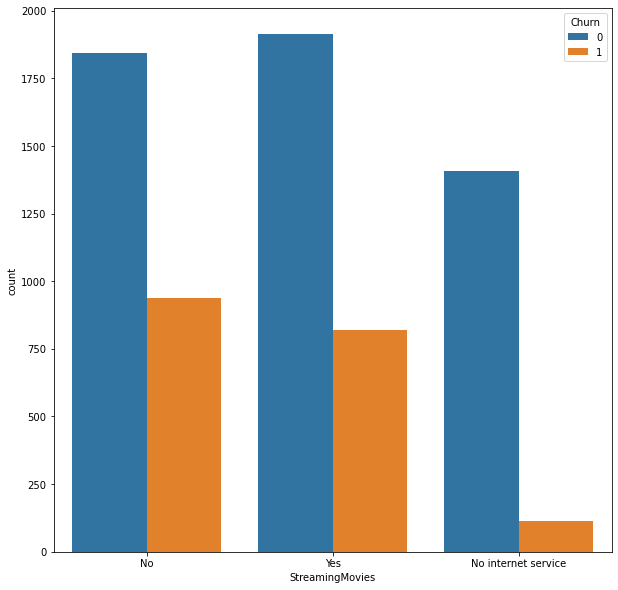

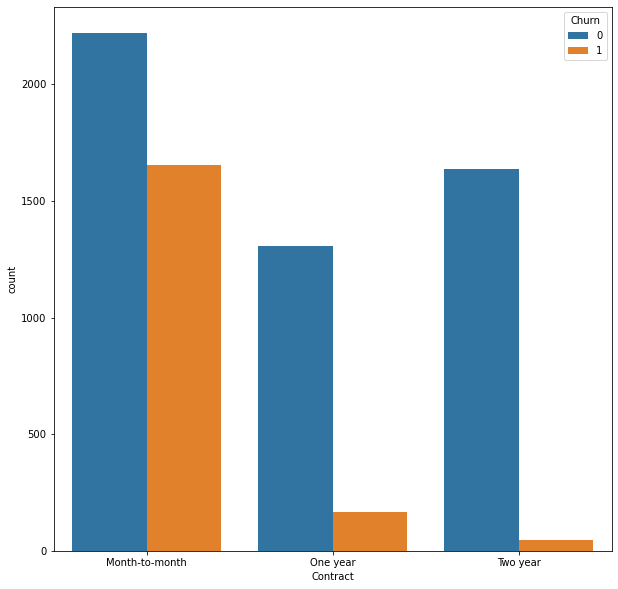

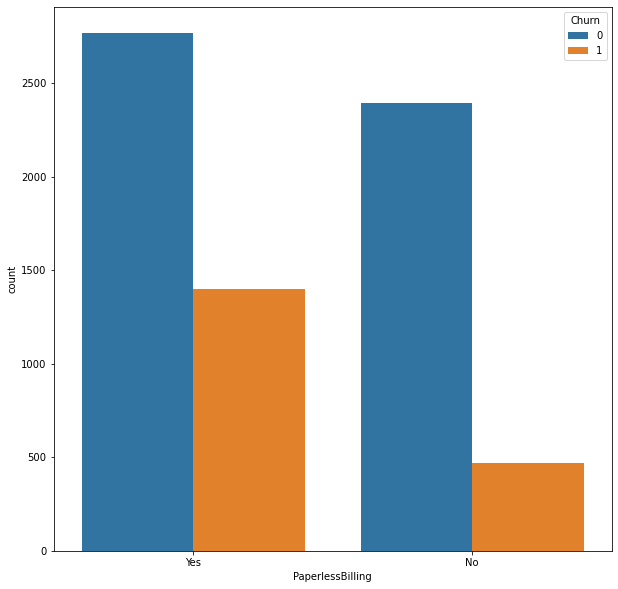

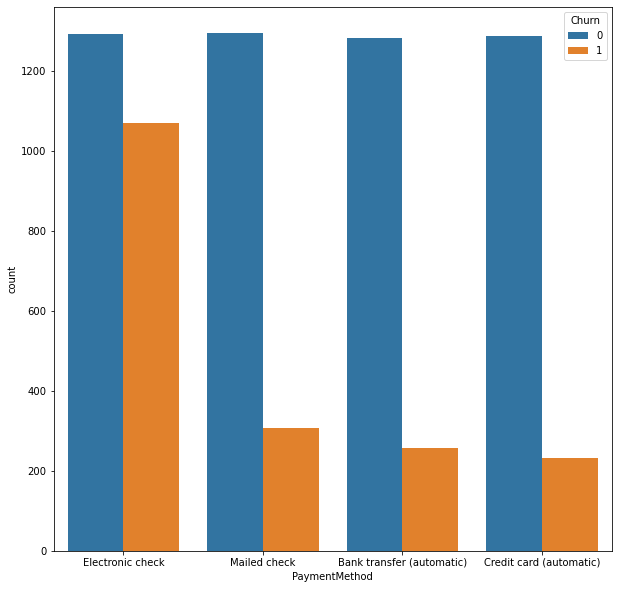

In [23]:
for col in column_cat:
    plot_category(col)

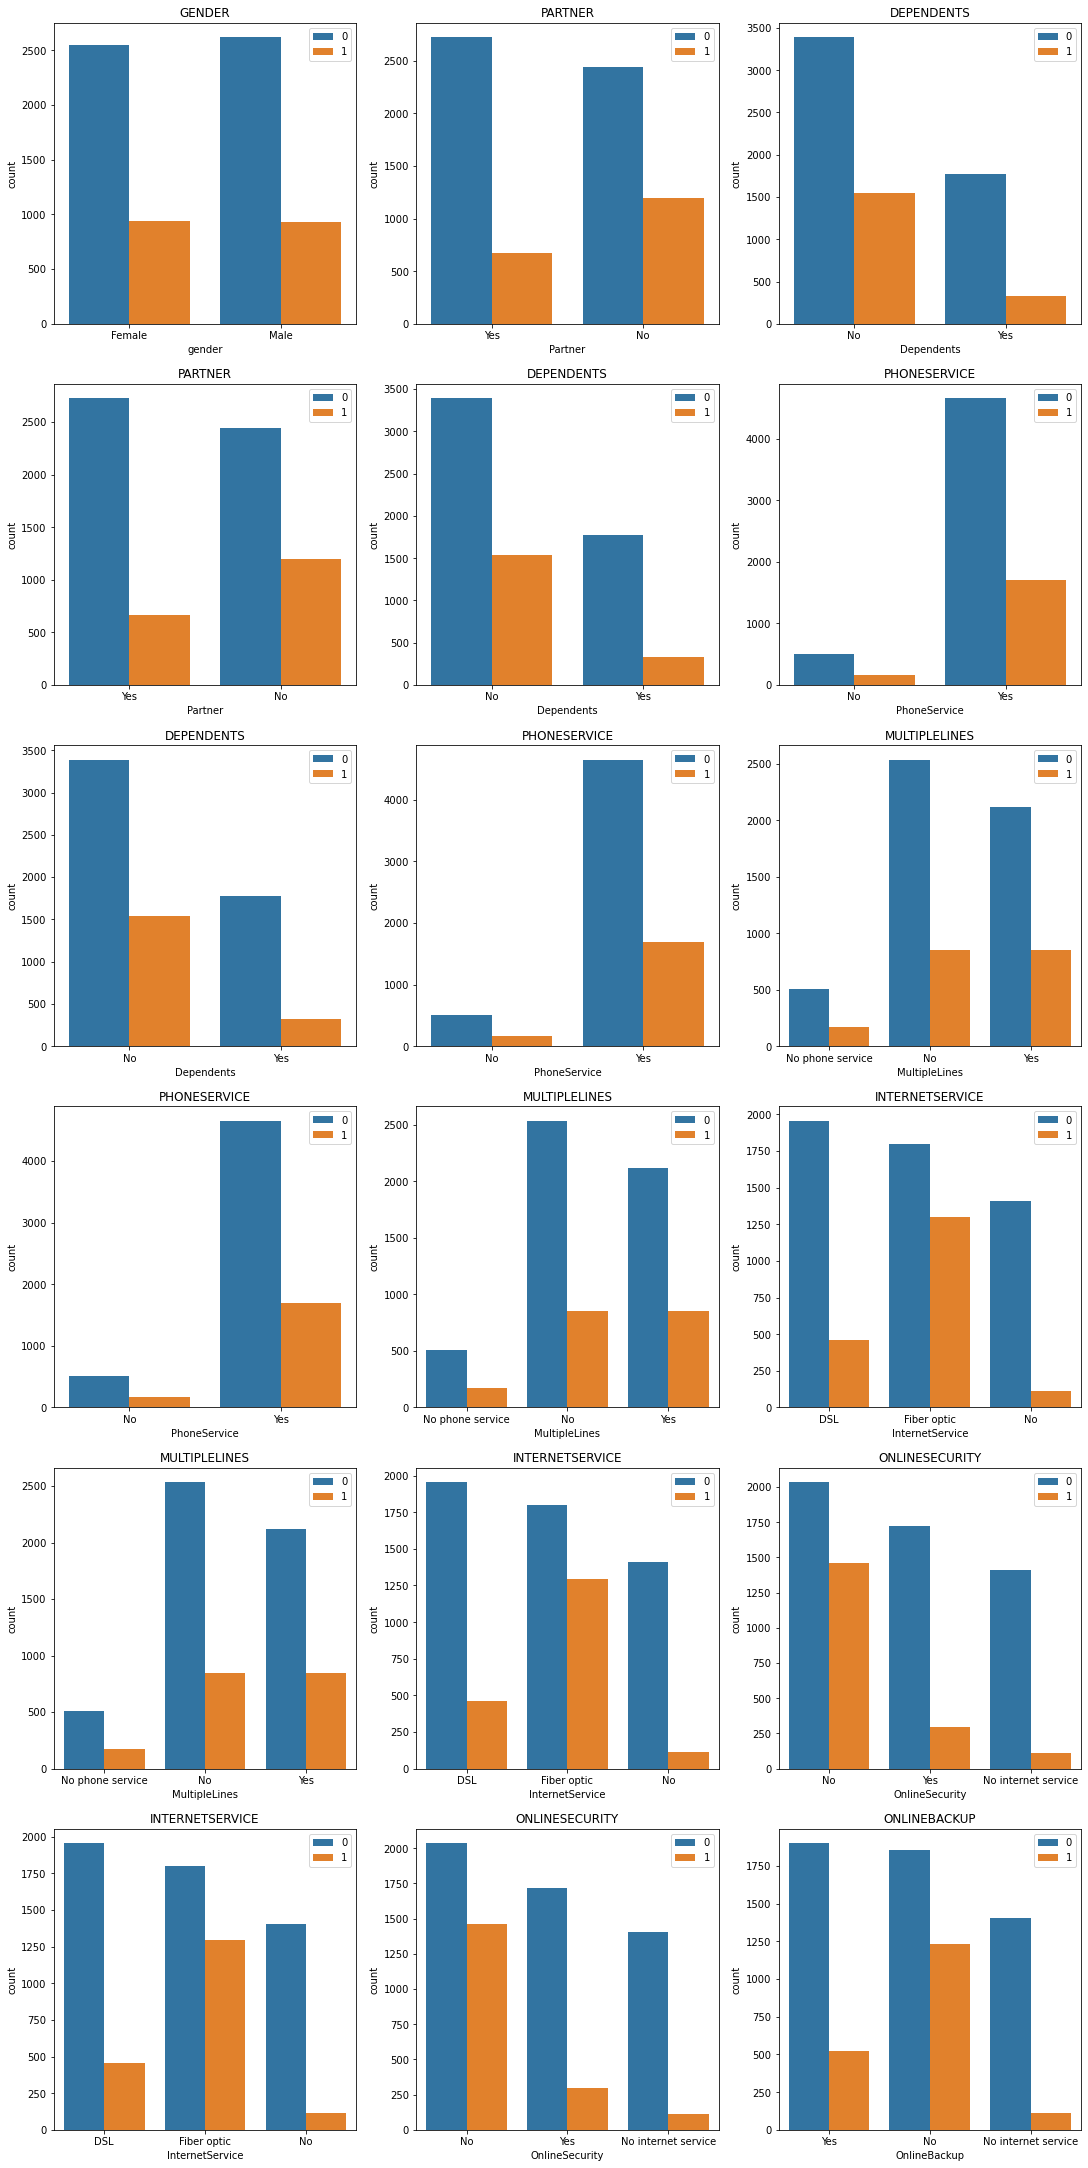

In [24]:
def plot_categoricals(colums, ncols):
    # Numero de graficas a realizar
    nplot = len(colums)
    nrows = ( nplot // ncols ) + 1
    fig, axes = plt.subplots(nrows,ncols, figsize=(15,30), constrained_layout=True)
    for row in range(nrows):
        for col in range(ncols):
            title = colums[row+col]
            sns.countplot(data=df_data, x=title, hue='Churn', ax =axes[row,col])
            axes[row,col].set_title(title.upper())
            axes[row,col].set_xlabel(title)
            axes[row,col].legend()
    plt.show()

plot_categoricals(column_cat, 3)

<Figure size 720x720 with 0 Axes>

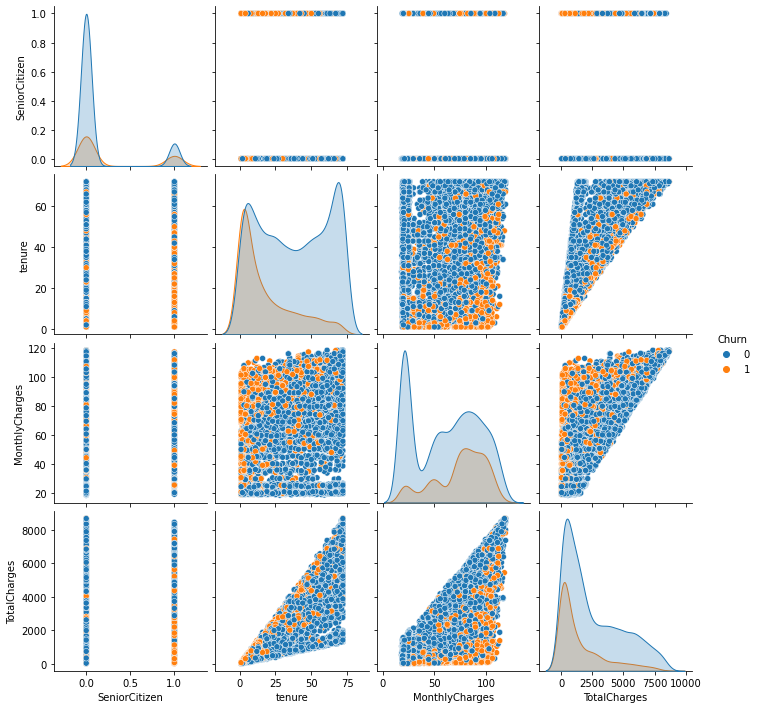

In [25]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(data=df_data, hue='Churn')
plt.show()

## Entrenamiento del modelo de regresion logistica binomial

In [26]:
x = df_data_processing_scaled.drop('Churn', axis=1)
y = df_data_processing_scaled['Churn'].values

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [28]:
x_train.shape

(4922, 45)

In [29]:
x_test.shape

(2110, 45)

In [30]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=10000)
result = model.fit(x_train, y_train)

In [31]:
from sklearn import metrics
predictions_test = model.predict(x_test)
print(metrics.accuracy_score(y_test,predictions_test))

0.795734597156398


## Evaluacion del modelo

In [32]:
model.predict_proba(x_test)

array([[0.99026975, 0.00973025],
       [0.86177928, 0.13822072],
       [0.30146833, 0.69853167],
       ...,
       [0.99036367, 0.00963633],
       [0.70107111, 0.29892889],
       [0.82854885, 0.17145115]])

In [33]:
model.coef_

array([[ 0.21796045, -3.11260494, -0.16372006,  1.20641815,  0.01148317,
        -0.01172256, -0.06126455,  0.06102516,  0.1278296 , -0.12806899,
         0.09418072, -0.09442011, -0.15367237,  0.09418072,  0.05925226,
        -0.41044035,  0.51836126, -0.10816029,  0.24669457, -0.10816029,
        -0.13877367,  0.09080298, -0.10816029,  0.01711793,  0.06327109,
        -0.10816029,  0.04464982,  0.22751867, -0.10816029, -0.11959776,
        -0.07898658, -0.10816029,  0.18690748, -0.08020805, -0.10816029,
         0.18812896,  0.74999027, -0.08812263, -0.66210702, -0.1036894 ,
         0.10345001,  0.00369774, -0.15329024,  0.22140627, -0.07205315]])

AxesSubplot(0.125,0.125;0.775x0.755)


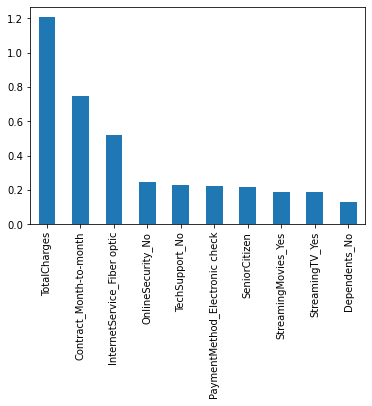

In [34]:
weights = pd.Series(model.coef_[0], index=x.columns.values)
print(weights.sort_values(ascending=False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


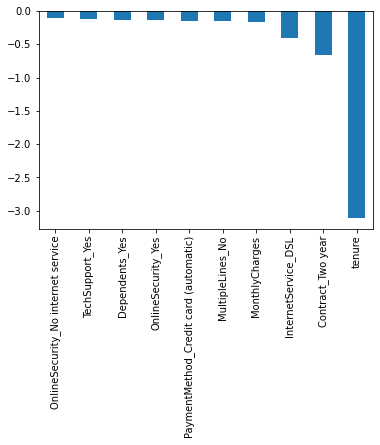

In [35]:
weights = pd.Series(model.coef_[0], index=x.columns.values)
print(weights.sort_values(ascending=False)[-10:].plot(kind='bar'))

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

<Figure size 720x720 with 0 Axes>

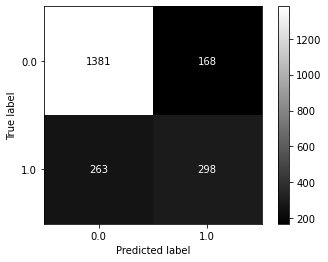

In [37]:
fig = plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, predictions_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
disp.plot(cmap='gray')
plt.show()